In [1]:
from HARK.ConsumptionSaving.ConsIndShockModel import (
    PerfForesightConsumerType,
    IndShockConsumerType,
    KinkedRconsumerType,
    init_lifecycle,
    init_cyclical,
)
from HARK.utilities import plot_funcs_der, plot_funcs
from time import time

In [2]:
mystr = lambda number: "{:.4f}".format(number)

In [3]:
do_simulation = True

In [4]:
# Make and solve an example perfect foresight consumer
PFexample = PerfForesightConsumerType()
# Make this type have an infinite horizon
PFexample.cycles = 0

In [5]:
start_time = time()
PFexample.solve()
end_time = time()
print(
    "Solving a perfect foresight consumer took "
    + mystr(end_time - start_time)
    + " seconds."
)
PFexample.unpack("cFunc")

Solving a perfect foresight consumer took 0.0587 seconds.


Perfect foresight consumption function:


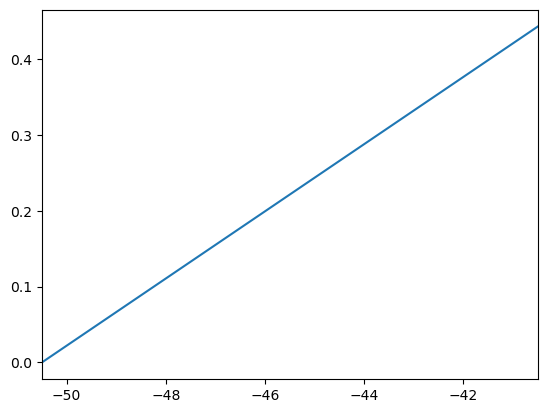

In [6]:
# Plot the perfect foresight consumption function
print("Perfect foresight consumption function:")
mMin = PFexample.solution[0].mNrmMin
plot_funcs(PFexample.cFunc[0], mMin, mMin + 10)

In [7]:
if do_simulation:
    PFexample.T_sim = 120  # Set number of simulation periods
    PFexample.track_vars = ["mNrm"]
    PFexample.initialize_sim()
    PFexample.simulate()

In [8]:
# Make and solve an example consumer with idiosyncratic income shocks
IndShockExample = IndShockConsumerType()
IndShockExample.cycles = 0  # Make this type have an infinite horizon

In [9]:
start_time = time()
IndShockExample.solve()
end_time = time()
print(
    "Solving a consumer with idiosyncratic shocks took "
    + mystr(end_time - start_time)
    + " seconds."
)
IndShockExample.unpack("cFunc")

GPFRaw                 = 0.984539 


GPFNrm                 = 0.993777 


GPFAggLivPrb           = 0.964848 


Thorn = APF            = 0.994384 


PermGroFacAdj          = 1.000611 


uInvEpShkuInv          = 0.990704 


VAF                    = 0.932054 


WRPF                   = 0.213705 


DiscFacGPFNrmMax       = 0.972061 


DiscFacGPFAggLivPrbMax = 1.010600 


Solving a consumer with idiosyncratic shocks took 0.1903 seconds.


Concave consumption function:


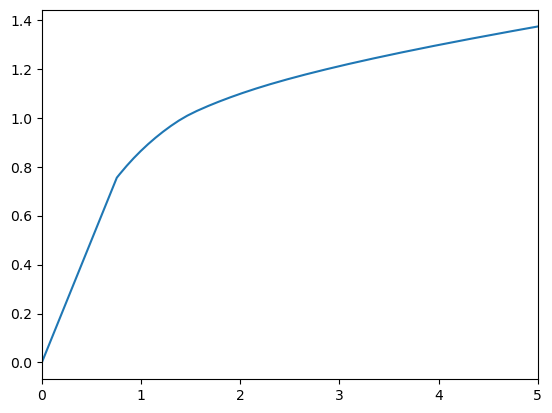

Marginal consumption function:


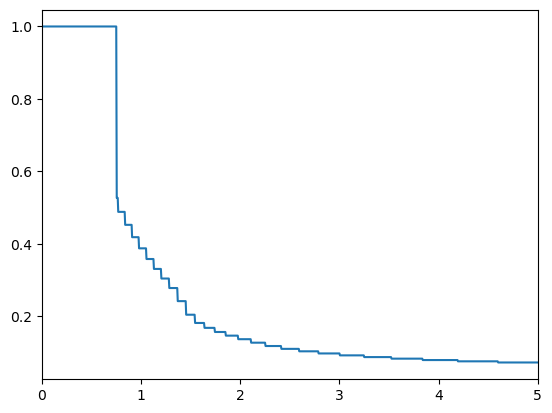

In [10]:
# Plot the consumption function and MPC for the infinite horizon consumer
print("Concave consumption function:")
plot_funcs(IndShockExample.cFunc[0], IndShockExample.solution[0].mNrmMin, 5)
print("Marginal consumption function:")
plot_funcs_der(IndShockExample.cFunc[0], IndShockExample.solution[0].mNrmMin, 5)

Consumption functions for perfect foresight vs idiosyncratic shocks:


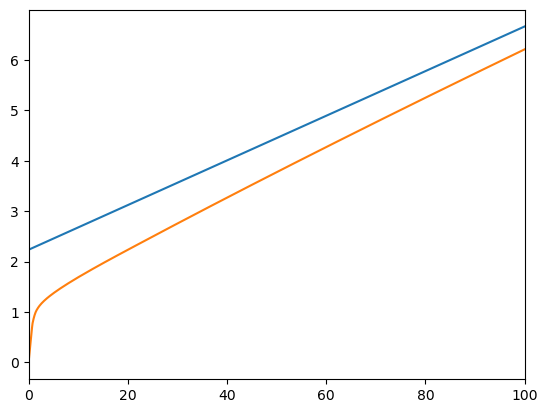

In [11]:
# Compare the consumption functions for the perfect foresight and idiosyncratic
# shock types.  Risky income cFunc asymptotically approaches perfect foresight cFunc.
print("Consumption functions for perfect foresight vs idiosyncratic shocks:")
plot_funcs(
    [PFexample.cFunc[0], IndShockExample.cFunc[0]],
    IndShockExample.solution[0].mNrmMin,
    100,
)

In [12]:
# Compare the value functions for the two types
if IndShockExample.vFuncBool:
    print("Value functions for perfect foresight vs idiosyncratic shocks:")
    plot_funcs(
        [PFexample.solution[0].vFunc, IndShockExample.solution[0].vFunc],
        IndShockExample.solution[0].mNrmMin + 0.5,
        10,
    )

In [13]:
# Simulate some data; results stored in mNrm_hist, cNrm_hist, and pLvl_hist
if do_simulation:
    IndShockExample.T_sim = 120
    IndShockExample.track_vars = ["mNrm", "cNrm", "pLvl"]
    IndShockExample.make_shock_history()  # This is optional, simulation will draw shocks on the fly if it isn't run.
    IndShockExample.initialize_sim()
    IndShockExample.simulate()

In [14]:
# Make and solve an idiosyncratic shocks consumer with a finite lifecycle
LifecycleExample = IndShockConsumerType(**init_lifecycle)
LifecycleExample.cycles = (
    1  # Make this consumer live a sequence of periods exactly once
)

In [15]:
start_time = time()
LifecycleExample.solve()
end_time = time()
print("Solving a lifecycle consumer took " + mystr(end_time - start_time) + " seconds.")
LifecycleExample.unpack("cFunc")

Solving a lifecycle consumer took 0.1470 seconds.


Consumption functions while working:


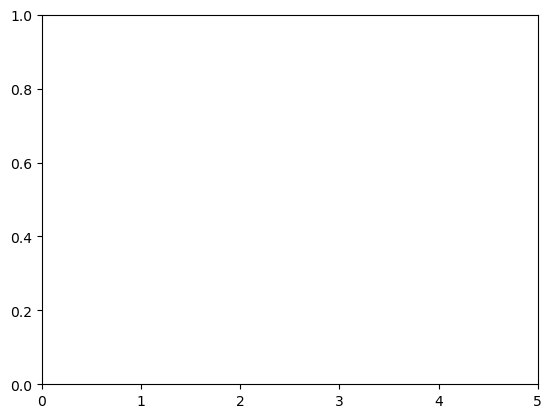

In [16]:
# Plot the consumption functions during working life
print("Consumption functions while working:")
mMin = min(
    [LifecycleExample.solution[t].mNrmMin for t in range(LifecycleExample.T_cycle)]
)
plot_funcs(LifecycleExample.cFunc[: LifecycleExample.T_retire], mMin, 5)

Consumption functions while retired:


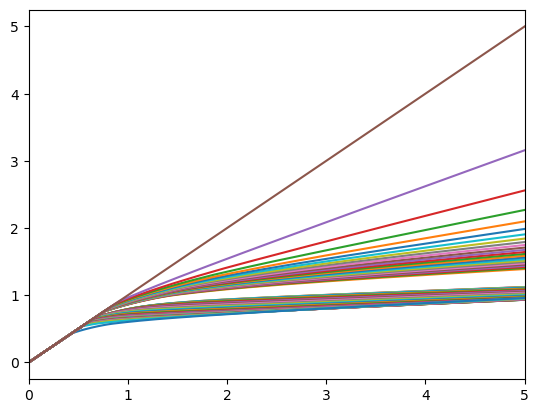

In [17]:
# Plot the consumption functions during retirement
print("Consumption functions while retired:")
plot_funcs(LifecycleExample.cFunc[LifecycleExample.T_retire :], 0, 5)

In [18]:
# Simulate some data; results stored in mNrm_hist, cNrm_hist, pLvl_hist, and t_age_hist
if do_simulation:
    LifecycleExample.T_sim = 120
    LifecycleExample.track_vars = ["mNrm", "cNrm", "pLvl", "t_age"]
    LifecycleExample.initialize_sim()
    LifecycleExample.simulate()

In [19]:
# Make and solve a "cyclical" consumer type who lives the same four quarters repeatedly.
# The consumer has income that greatly fluctuates throughout the year.
CyclicalExample = IndShockConsumerType(**init_cyclical)
CyclicalExample.cycles = 0

In [20]:
start_time = time()
CyclicalExample.solve()
end_time = time()
print("Solving a cyclical consumer took " + mystr(end_time - start_time) + " seconds.")
CyclicalExample.unpack("cFunc")

Solving a cyclical consumer took 0.1949 seconds.


Quarterly consumption functions:


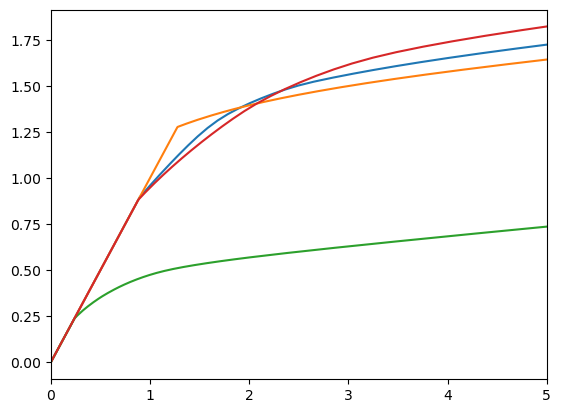

In [21]:
# Plot the consumption functions for the cyclical consumer type
print("Quarterly consumption functions:")
mMin = min([X.mNrmMin for X in CyclicalExample.solution])
plot_funcs(CyclicalExample.cFunc, mMin, 5)

In [22]:
# Simulate some data; results stored in cHist, mHist, bHist, aHist, MPChist, and pHist
if do_simulation:
    CyclicalExample.T_sim = 480
    CyclicalExample.track_vars = ["mNrm", "cNrm", "pLvl", "t_cycle"]
    CyclicalExample.initialize_sim()
    CyclicalExample.simulate()

In [23]:
# Make and solve an agent with a kinky interest rate
KinkyExample = KinkedRconsumerType()
KinkyExample.cycles = 0  # Make the Example infinite horizon

Solving a kinky consumer took 0.1114 seconds.
Kinky consumption function:


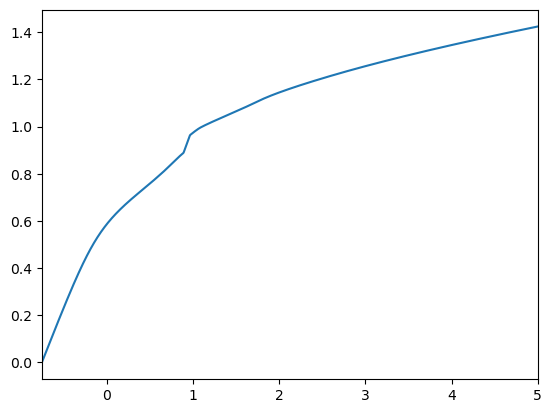

In [24]:
start_time = time()
KinkyExample.solve()
end_time = time()
print("Solving a kinky consumer took " + mystr(end_time - start_time) + " seconds.")
KinkyExample.unpack("cFunc")
print("Kinky consumption function:")
plot_funcs(KinkyExample.cFunc[0], KinkyExample.solution[0].mNrmMin, 5)

In [25]:
if do_simulation:
    KinkyExample.T_sim = 120
    KinkyExample.track_vars = ["mNrm", "cNrm", "pLvl"]
    KinkyExample.initialize_sim()
    KinkyExample.simulate()